# Sequencing Analysis


After retrieving the .fasta files from the sequencing, we ran the following blast command for each to identify the stands/primers:

*blastn -query primers.fasta -subject \[name of input file, e.g., F1_sequences.fasta\] -task blastn-short -dust no -max_target_seqs 1,000,000 -word_size 4 -reward 1 -penalty -2 -outfmt 6 -out \[name of output file\]*

Here, we run some analysis on the sequencing results from blast to find the number of target and nontarget files amplified for each trial of our PCR run.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columnsDf = []
for f in  range(1, 10):
    for r in range(1,10):
        newCol = "FP" +  str(f) + "/RP" + str(r) # adding all the names of files to columns of output file
        columnsDf.append(newCol)
fileCounts = pd.DataFrame(columns = columnsDf)

# files contains pairs of file names, the file containing the .txt output from the blast command and the new file created
# ---- after this processing script is run
files = [["outputF1.txt", "outputF1Proc.txt"], ["outputF2.txt", "outputF2Proc.txt"], ["outputF3.txt", "outputF3Proc.txt"], 
         ["outputF4.txt", "outputF4Proc.txt"], ["outputF5.txt", "outputF5Proc.txt"]]

beginF = "Sequencing Data/" # where sequencing data files are located

filePrims = {} # 


In [4]:
for names in files:       
    # set all counts back to zero    
    primerCounts = {"FP1" : 0, "FP1 prop" : 0, "FP2" : 0, "FP2 prop" : 0,
                    "FP3" : 0, "FP3 prop" : 0, "FP4" : 0, "FP4 prop" : 0,
                    "FP5" : 0, "FP5 prop" : 0, "FP6" : 0, "FP6 prop" : 0,
                    "FP7" : 0, "FP7 prop" : 0, "FP8" : 0, "FP8 prop" : 0,
                    "FP9" : 0, "FP9 prop" : 0, "RP1" : 0, "RP1 prop" : 0,
                    "RP2" : 0, "RP2 prop" : 0, "RP3" : 0, "RP3 prop" : 0,
                    "RP4" : 0, "RP4 prop" : 0, "RP5" : 0, "RP5 prop" : 0,
                    "RP6" : 0, "RP6 prop" : 0, "RP7" : 0, "RP7 prop" : 0,
                    "RP8" : 0, "RP8 prop" : 0, "RP9" : 0, "RP9 prop" : 0,
                   }
    
    # open the necessary files
    f2 = open(beginF +"Output after Processing Script/"+  names[1], 'r+') #will have processed data
    f2.truncate(0) # remove first row
    
    f = open(beginF + "Sequencing Data after Blast/" +names[0]) # original data
    count = 0 # count what line you are on
    sumTot = 0 # count total number of lines
    
    primerPairs = []
    # process data
    for line in f: # loop through every line in data
        parsed = line.split() 
        count = count + 1
        if (count > 2): # start from the second row
            minLength = 15
            maxSend = 85
            #remove unwanted rows with values outside the specified limits
            if (not (int(parsed[3]) < minLength or int(parsed[9]) > maxSend)): # only adds lines with specified length/send to processed data
                f2.write(line)
                sumTot = sumTot + 1
                primer = parsed[0]
                primerCounts[primer] = primerCounts[primer] + 1 # incrementing respective primer count
                # check if sseqid is in the list
                ss = parsed[1]
                if (ss in filePrims): # found a match!
                    primerPairs.append([filePrims[ss], parsed[0]])
                    del filePrims[ss]
                else: 
                    filePrims[ss] = parsed[0]
    
    #count occurences of each file
    TBA = []
    index = 0
    for f in  range(1, 10): # loop through all the possible files and actual primer pairs
        for r in range(1,10):
            countfile = 0
            for pair in primerPairs:
                if (pair[0] == ("FP"+str(f)) and pair[1] == ("RP"+str(r))):
                    countfile+=1 # increment counter for 
            TBA.append(countfile) # TBA has list of counts for each file
    a_series = pd.Series(TBA, index = fileCounts.columns)
    fileCounts = fileCounts.append(a_series, ignore_index=True)
            
    # add proportions
    for key in primerCounts:
        if (len(key) == 3): 
            prop = primerCounts[key] / sumTot
            primerCounts[key + " prop"]= prop
    filePrims = {}

27203.5
98081.0
44593.5
48338.5
61584.0


In [6]:
fileCounts.to_csv("filesCountRaw.csv") # write counts to a .csv file

## Plot the Sequencing Data

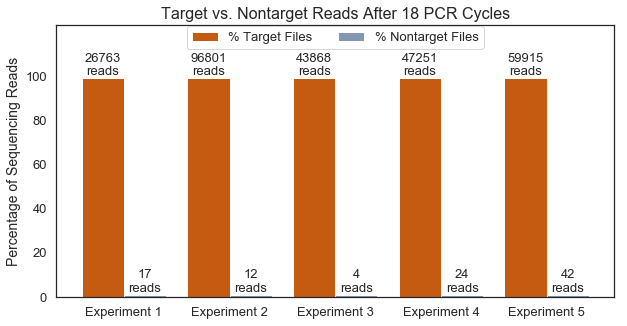

In [41]:
#sns.set(font="Verdana")
sns.set_style("white")
sm = 13
med = 14
lg = 16
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (1, 1, 1, 1, 1)
# Specify the values of orange bars (height)
orange_bar = (99, 99, 99, 99, 99)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.4

# Plotting
bar2 = plt.bar(ind, orange_bar, width, label='% Target Files', color ='#C55A11')
bar1 = plt.bar(ind+width, blue_bar , width, label='% Nontarget Files', color = '#8497B0')

readCounts = ['17\nreads', '12\nreads', '4\nreads', '24\nreads','42\nreads', '26763\nreads','96801\nreads', 
              '43868\nreads', '47251\nreads', '59915\nreads']
indexo=0
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, readCounts[indexo], 
             ha='center', va='bottom', wrap =True, fontsize=sm)
    indexo = indexo +  1

# plt.xlabel('Here goes x-axis label')
plt.ylabel('Percentage of Sequencing Reads', fontsize=med)
# plt.xlabel('File being Amplified')
plt.title('Target vs. Nontarget Reads After 18 PCR Cycles', fontsize=lg)
plt.yticks([0,20,40,60,80,100], fontsize=sm)
plt.ylim([0, 123])

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Experiment 1', 'Experiment 2', 'Experiment 3',  'Experiment 4',  'Experiment 5'), fontsize=sm)

# Finding the best position for legends and putting it
plt.legend(loc='upper center', ncol=2, fontsize=sm, bbox_to_anchor=(.5,1.02))
plt.savefig('barplot.svg', dpi=1000)
plt.show()